In [1]:
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt

In [21]:
#update to W
def l1_mult_update(X, W, H): 
    m,n = np.shape(X)
    _,k = np.shape(W)
    
    X_approx = W@H
    res_mat = np.abs(X - X_approx)
    
    new_W = np.zeros(np.shape(W))
    for s in range(m):
        for t in range(k):
            #new_W[s,t] = W[s,t]*np.sum(X[s,:]/(res_mat[s,:]))/(np.sum(X_approx[s,:]*H[t,:]/(res_mat[s,:]+1e-10))+1e-10)
            denom1 = np.maximum(1e-10,np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])]))
            term2 = np.maximum(1e-10,np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])]))
            new_W[s, t] = (W[s, t]/denom1)*(term2)
            
    return new_W

In [10]:
def l1_mult_updates(X,k,max_iter,W,H):
    m,n = np.shape(X)
    #W = np.random.rand(m,k)
    #H = np.random.rand(k,n)
    
    for t in range(max_iter):
        W = l1_mult_update(X,W,H)
        H = l1_mult_update(X.transpose(),H.transpose(),W.transpose()).transpose()
        
    return W,H

In [11]:
X = np.random.rand(1000,100)
k = 10

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

print(np.linalg.norm(X-W@H,1))

W,H = l1_mult_updates(X,k,10,W,H)

print(np.linalg.norm(X-W@H,1))

2983.5493905868993
264.35267399264444


In [12]:
errs = []

X = np.random.rand(1000,100)
k = 10

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

num_iters = 10

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)

    errs.append(np.linalg.norm(X-W@H,1))

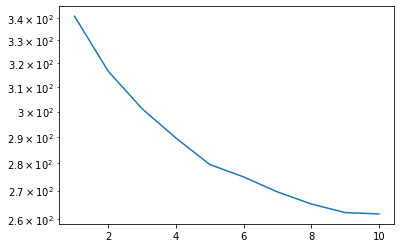

In [13]:
plt.semilogy(range(1,num_iters+1),errs)

In [14]:
errs = []

k = 10
X = np.random.rand(1000,k)@np.random.rand(k,100)

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

num_iters = 100

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)

    errs.append(np.linalg.norm(X-W@H,1))

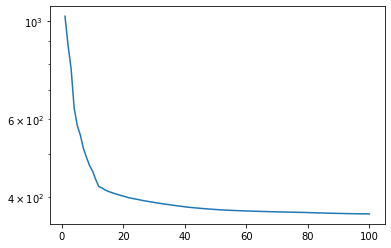

In [15]:
plt.semilogy(range(1,num_iters+1),errs)

## Sanity Checks

In [28]:
errs = []
W_opt = np.random.rand(1000,k)
H_opt = np.random.rand(k,100)

k = 10
X = W_opt@H_opt

init_noise = 1e-10

W = W_opt + init_noise*(np.random.rand(1000,k)<0.1)
H = H_opt + init_noise*(np.random.rand(k,100)<0.1)

num_iters = 100

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)

    errs.append(np.linalg.norm(X-W@H,1))

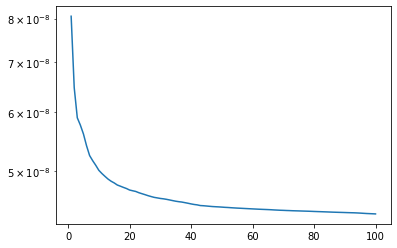

In [29]:
plt.semilogy(range(1,num_iters+1),errs)

## Confirmation of Hand Calculation

In [17]:
x = [0, 1, 1, 0, 3, 4, 6, -1, 0, 1]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
z = 0

for i in np.argwhere(x):
  z += y[i.item()]

print(z)

41


In [8]:
X = np.array([[1, 2, 1], 
              [3, 0, 2], 
              [1, 1, 4]])

W = np.array([[1, 2],
              [0, 1],
              [2, 1]])

H = np.array([[1, 1, 3],
              [0, 2, 2]])

X_approx = W@H
res_mat = np.abs(X - X_approx)
new_W = np.zeros(np.shape(W))

m = 3
n = 3
k = 2

s = 2
t = 0

for s in range(m):
    for t in range (k):
        denom1 = 0
        term2 = 0
        #for j in np.argwhere(res_mat[s,:]):
        #    denom1 += (X_approx[s, j.item()]*H[t, j.item()])/res_mat[s, j.item()]
        #    term2 += (X[s, j.item()]*H[t, j.item()])/res_mat[s, j.item()]
        denom1 = np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
        term2 = np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
        new_W[s, t] = (W[s, t]/denom1)*(term2)

print(new_W)



[[0.22580645 0.58823529]
 [0.         0.        ]
 [0.92857143 0.4       ]]


In [4]:
X_approx[s,np.argwhere(res_mat[s,:])]

array([[2],
       [4],
       [8]])

In [5]:
s

2

In [6]:
t

1